<a href="https://colab.research.google.com/github/Quezia-Moura/TrabalhoP1_Probabilidade-e-Estatistica/blob/main/Copy_of_Analise_Estatistica_Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise das Olimpíadas

##Configurações Iniciais

###Importação das bibliotecas necessárias

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Carregamento dos dados

In [2]:
path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

data = pd.read_csv(path + "/athlete_events.csv")

100%|██████████| 5.43M/5.43M [00:00<00:00, 64.5MB/s]

Extracting files...


###Configurações gerais para gráficos

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

##Analise Descritiva

In [4]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
print("Dados Gerais:\n", data.describe(include="all"))
print("\n")
print("\nValores Nulos:\n", data.isnull().sum())


Dados Gerais:
                    ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN                134732       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.556898   
std      39022.286345                   NaN     NaN       6.393561   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      21.000000   
50%      68205.000000                   NaN     NaN      24.000000   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               Height         Weight           Team     NOC        Games  \
count   210945.000000  208241.000000         271116  271116       27

###Tratamento de Valores Ausentes


In [6]:
data['Age'] = data.groupby(['Sport', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [7]:
data['Height'] = data.groupby(['Sport', 'Sex'])['Height'].transform(lambda x: x.fillna(x.mean()))
data['Weight'] = data.groupby(['Sport', 'Sex'])['Weight'].transform(lambda x: x.fillna(x.mean()))

###Análise de Outliers

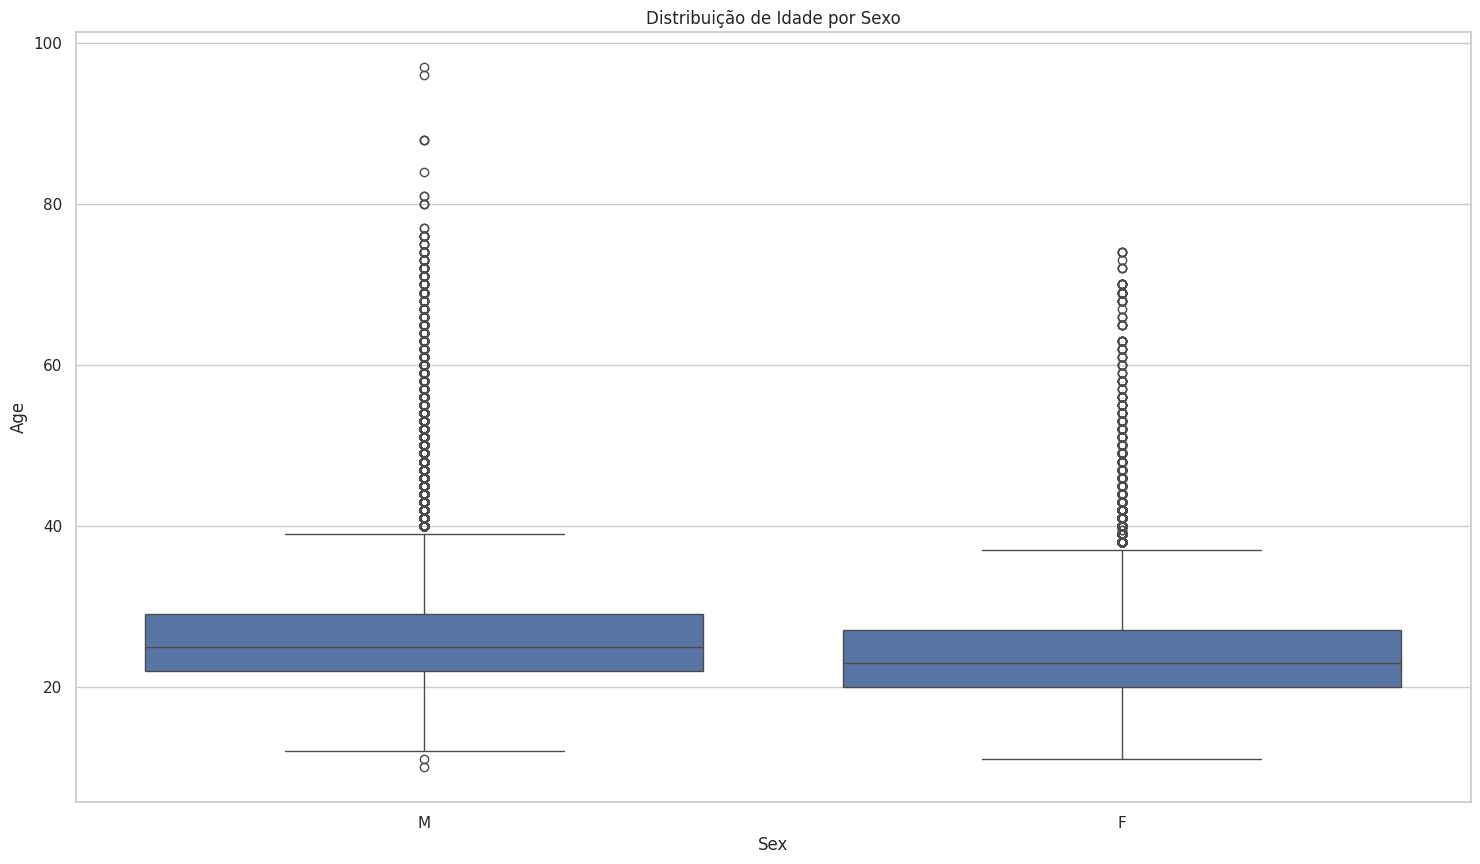

In [8]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x='Sex', y='Age')
plt.title("Distribuição de Idade por Sexo")
plt.show()

Definindo limite superior para idade (65 anos) e filtrando dados

In [9]:
outlier_threshold = 65
data = data[data['Age'] <= outlier_threshold]

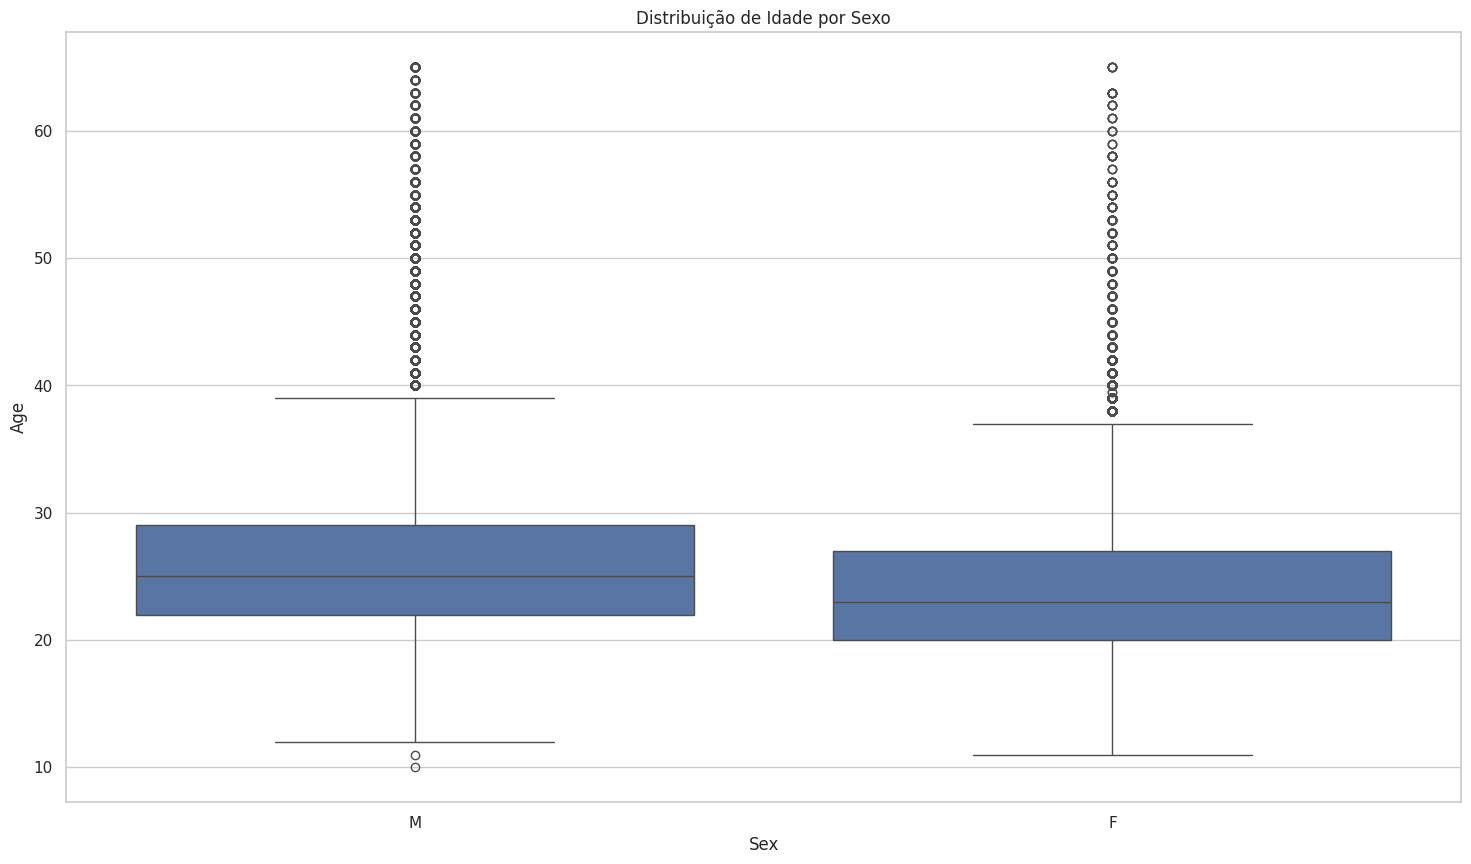

In [10]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x='Sex', y='Age')
plt.title("Distribuição de Idade por Sexo")
plt.show()

###Análise Demográfica e Estatísticas Básicas

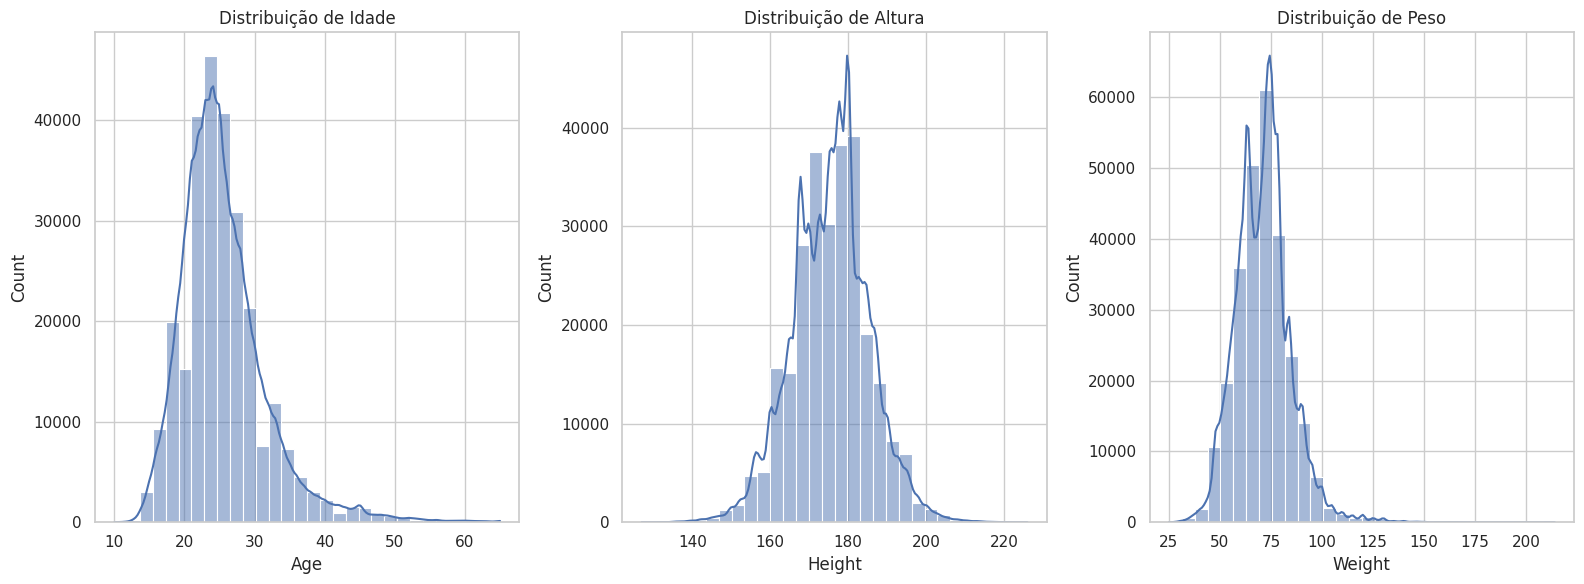

In [11]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='Age', kde=True, bins=30).set_title('Distribuição de Idade')
plt.subplot(1, 3, 2)
sns.histplot(data=data, x='Height', kde=True, bins=30).set_title('Distribuição de Altura')
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='Weight', kde=True, bins=30).set_title('Distribuição de Peso')
plt.tight_layout()
plt.show()

In [12]:
print("Dados Gerais:\n", data.describe(include="all"))
print("\n")
print("\nValores Nulos:\n", data.isnull().sum())

Dados Gerais:
                    ID                  Name     Sex            Age  \
count   270846.000000                270846  270846  270846.000000   
unique            NaN                134652       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    52  196369            NaN   
mean     68253.285384                   NaN     NaN      25.550926   
std      39024.456456                   NaN     NaN       6.206584   
min          1.000000                   NaN     NaN      10.000000   
25%      34644.000000                   NaN     NaN      22.000000   
50%      68209.000000                   NaN     NaN      25.000000   
75%     102106.750000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      65.000000   

               Height         Weight           Team     NOC        Games  \
count   270746.000000  270292.000000         270846  270846       27

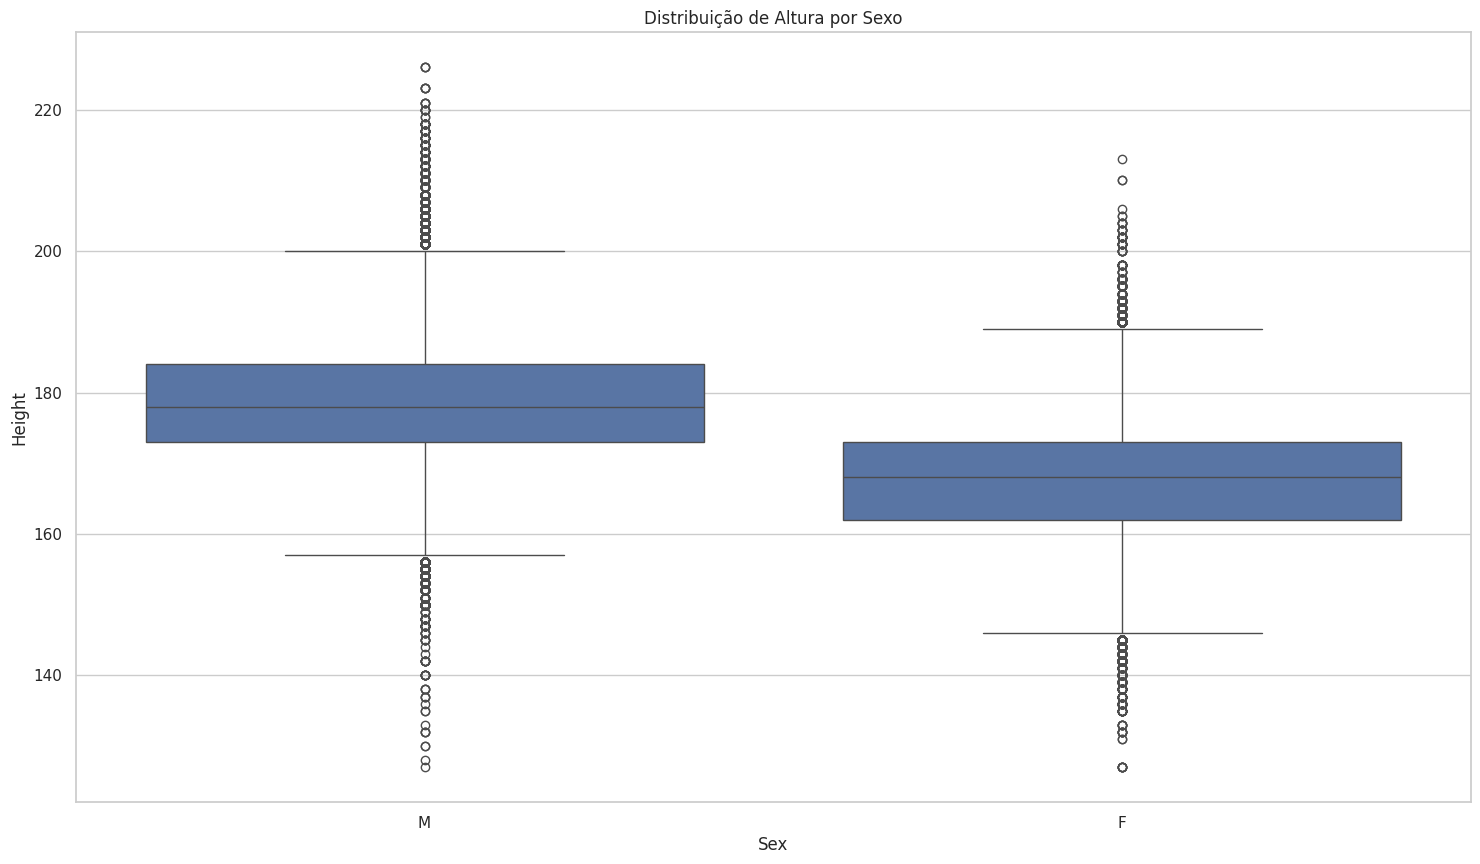

In [13]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x='Sex', y='Height')
plt.title("Distribuição de Altura por Sexo")
plt.show()

##Análise de Participação Olímpica ao Longo dos Anos

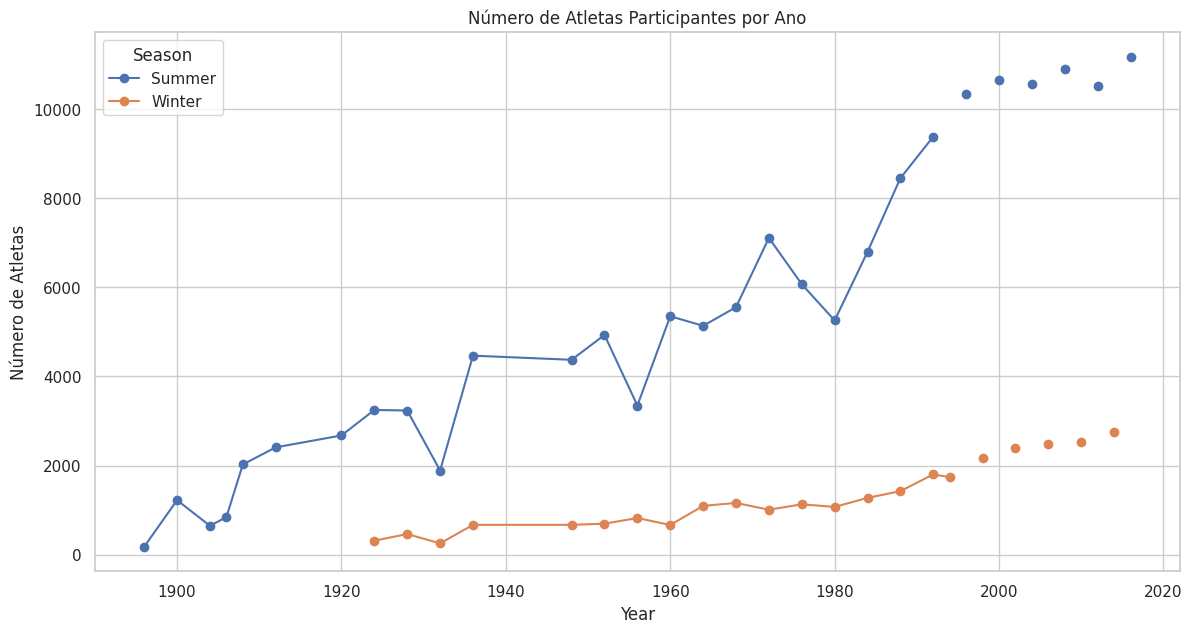

In [14]:
participacao_por_ano = data.groupby(['Year', 'Season'])['ID'].nunique().unstack()
participacao_por_ano.plot(kind='line', marker='o')
plt.title("Número de Atletas Participantes por Ano")
plt.ylabel("Número de Atletas")
plt.show()

###Análise de Atletas por País (Top 10)

<ipython-input-15-ea6b5792ae50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_teams.index, x=top_teams.values, palette="viridis")


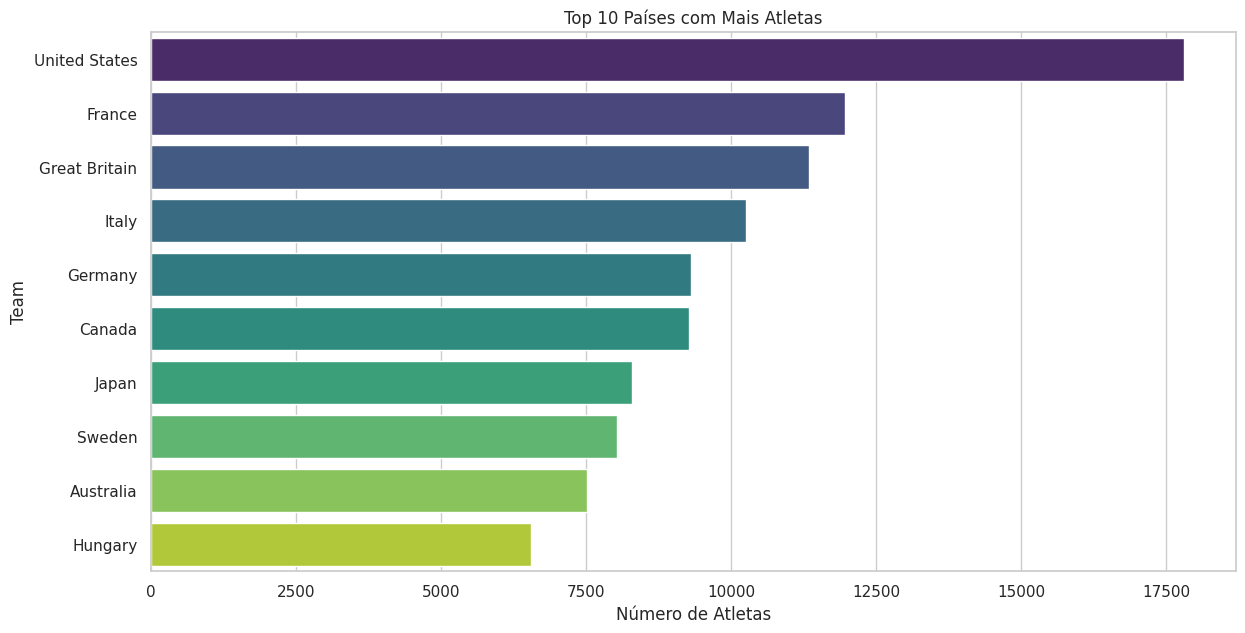

In [15]:
top_teams = data['Team'].value_counts().head(10)
sns.barplot(y=top_teams.index, x=top_teams.values, palette="viridis")
plt.title("Top 10 Países com Mais Atletas")
plt.xlabel("Número de Atletas")
plt.show()

Visualizamos os 10 países com mais medalhas na história olímpica.

<ipython-input-16-73b48c94339b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medalha_por_pais.index, x=medalha_por_pais.values, palette="magma")


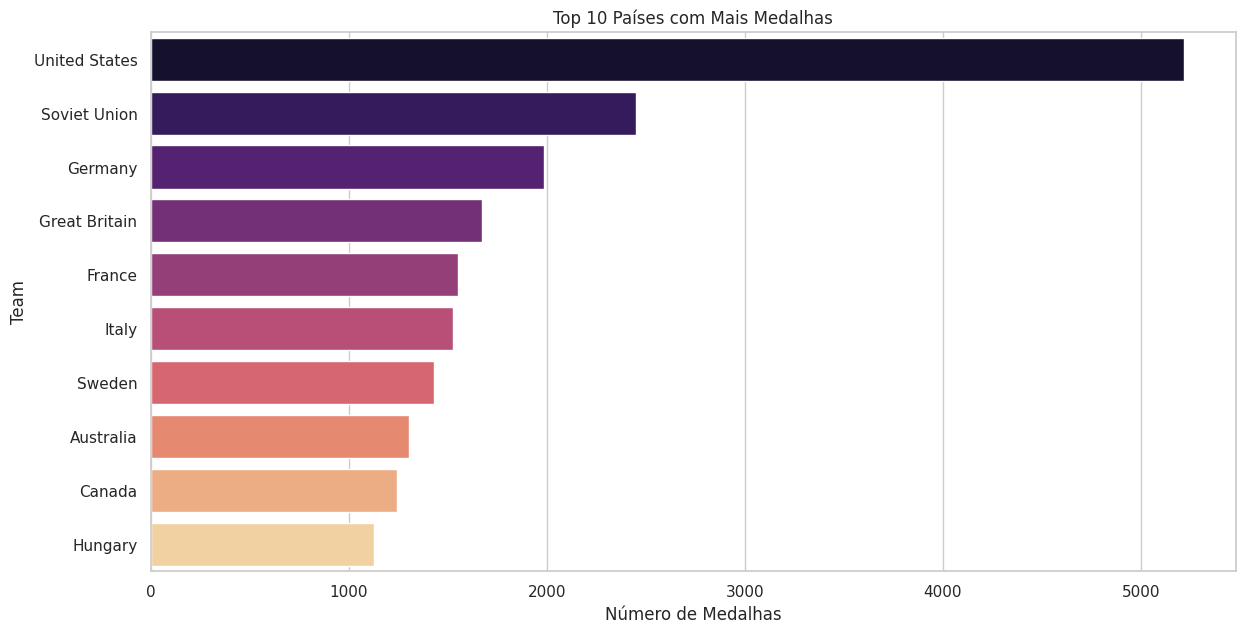

In [16]:
medalha_por_pais = data[data['Medal'].notna()]['Team'].value_counts().head(10)
sns.barplot(y=medalha_por_pais.index, x=medalha_por_pais.values, palette="magma")
plt.title("Top 10 Países com Mais Medalhas")
plt.xlabel("Número de Medalhas")
plt.show()

###Análise de Medalhas

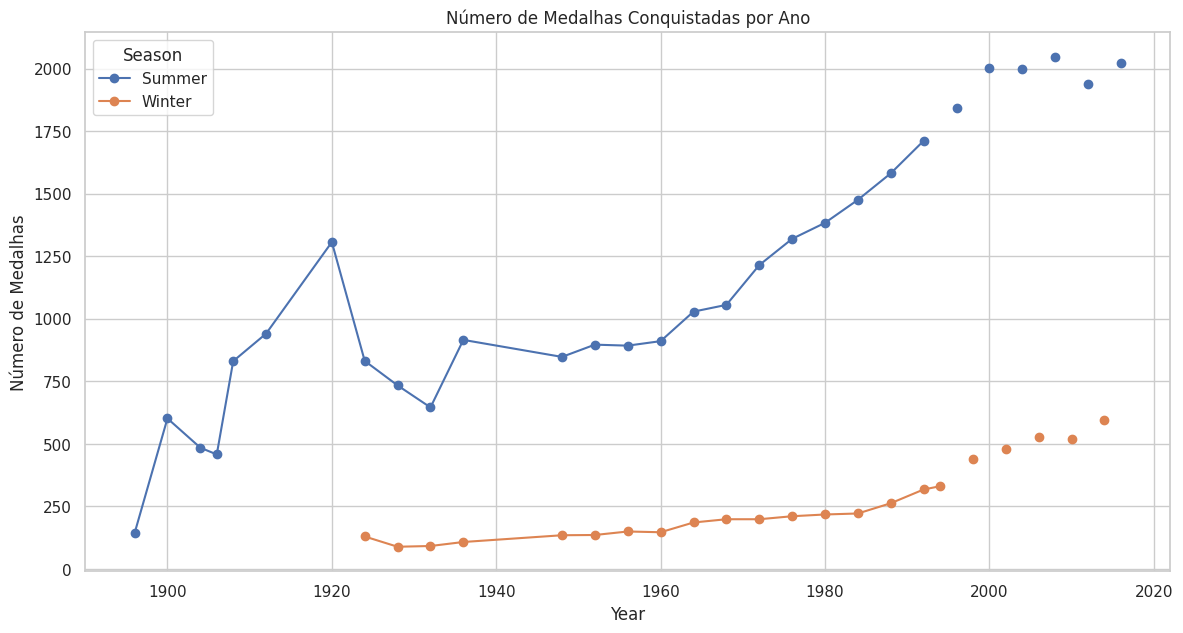

In [17]:
medalhas_por_ano = data[data['Medal'].notna()].groupby(['Year', 'Season'])['Medal'].count().unstack()
medalhas_por_ano.plot(kind='line', marker='o')
plt.title("Número de Medalhas Conquistadas por Ano")
plt.ylabel("Número de Medalhas")
plt.show()


##Analise de Peso e Altura por Esporte

In [18]:
df_filtered = data[['Sport', 'Weight']].dropna()

# Calculate the average weight per sport
avg_weight_per_sport = df_filtered.groupby('Sport').mean().sort_values(by='Weight', ascending=False)

# Select the top 5 sports with the highest and lowest average weights
top_5_highest_avg = avg_weight_per_sport.head(5)
top_5_lowest_avg = avg_weight_per_sport.tail(5)

# Filter the original dataset for only these top and bottom 5 sports
sports_to_include = pd.concat([top_5_lowest_avg, top_5_highest_avg]).index
df_filtered_top_bottom = df_filtered[df_filtered['Sport'].isin(sports_to_include)]

<ipython-input-19-9065f8ae14b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_top_bottom['Sport'] = pd.Categorical(df_filtered_top_bottom['Sport'],


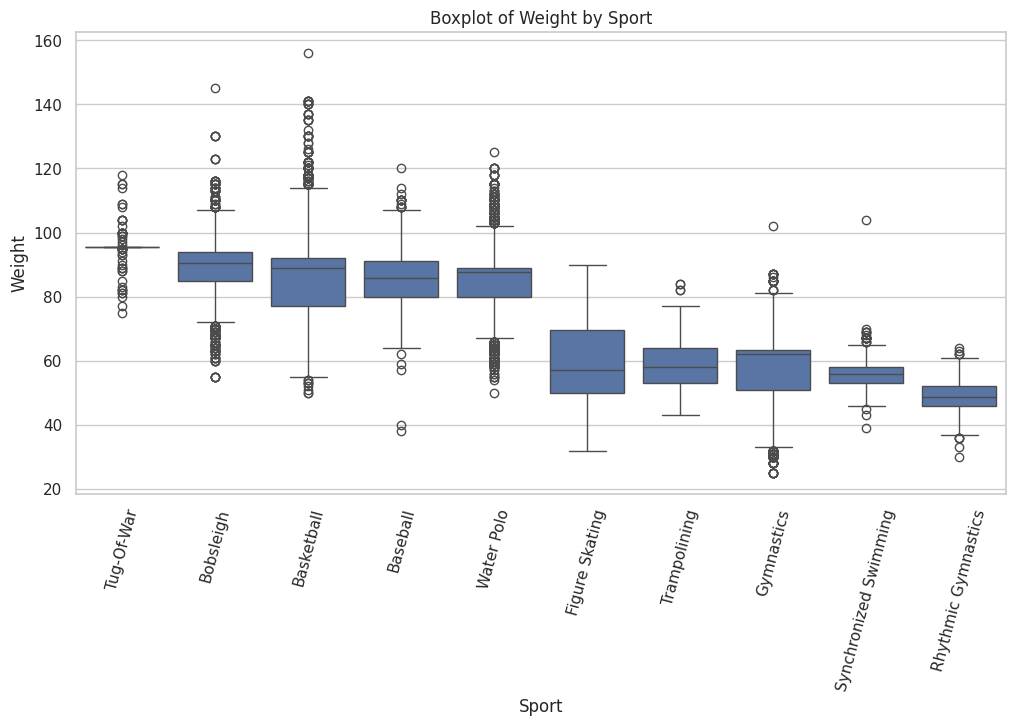

In [19]:
df_filtered_top_bottom['Sport'] = pd.Categorical(df_filtered_top_bottom['Sport'],
                                                 categories=pd.concat([top_5_highest_avg, top_5_lowest_avg]).index,
                                                 ordered=True)

# Plot the boxplot again with the ordered sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Weight', data=df_filtered_top_bottom)
plt.title('Boxplot of Weight by Sport')
plt.xticks(rotation=75)
plt.show()

<ipython-input-20-f37caef14d9f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_top_bottom_height['Sport'] = pd.Categorical(df_filtered_top_bottom_height['Sport'],


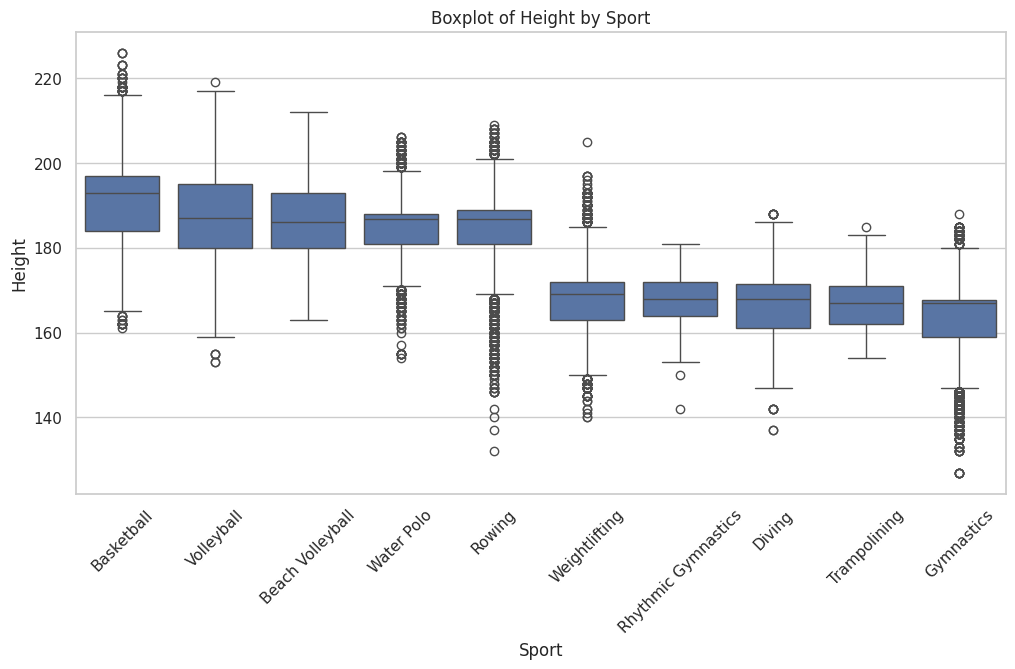

In [20]:
# Filter data for non-null 'Height' values and group by 'Sport' to calculate the mean height per sport
df_filtered_height = data[['Sport', 'Height']].dropna()

# Calculate the average height per sport
avg_height_per_sport = df_filtered_height.groupby('Sport').mean().sort_values(by='Height', ascending=False)

# Select the top 5 sports with the highest and lowest average heights
top_5_highest_avg_height = avg_height_per_sport.head(5)
top_5_lowest_avg_height = avg_height_per_sport.tail(5)

# Filter the original dataset for only these top and bottom 5 sports
sports_to_include_height = pd.concat([top_5_highest_avg_height, top_5_lowest_avg_height]).index
df_filtered_top_bottom_height = df_filtered_height[df_filtered_height['Sport'].isin(sports_to_include_height)]

# Reorder the sports by average height from lowest to highest
df_filtered_top_bottom_height['Sport'] = pd.Categorical(df_filtered_top_bottom_height['Sport'],
                                                        categories=pd.concat([top_5_highest_avg_height, top_5_lowest_avg_height]).index,
                                                        ordered=True)

# Plot a boxplot of height by sport for these top and bottom 5 sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Height', data=df_filtered_top_bottom_height)
plt.title('Boxplot of Height by Sport')
plt.xticks(rotation=45)
plt.show()


##Análise de Correlações

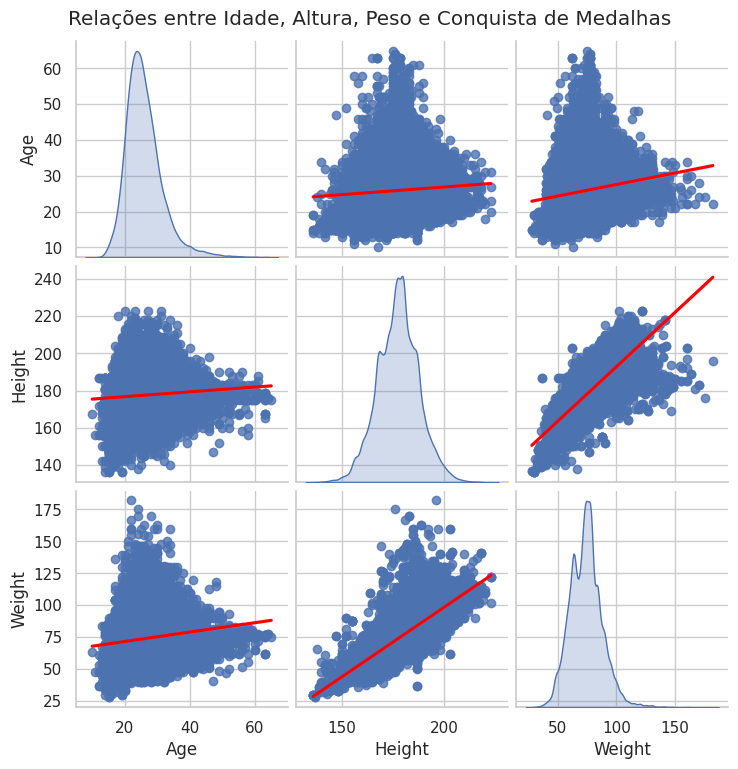

In [21]:
athlete_medals = data[data['Medal'].notna()]
sns.pairplot(athlete_medals[['Age', 'Height', 'Weight']], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Relações entre Idade, Altura, Peso e Conquista de Medalhas", y=1.02)
plt.show()

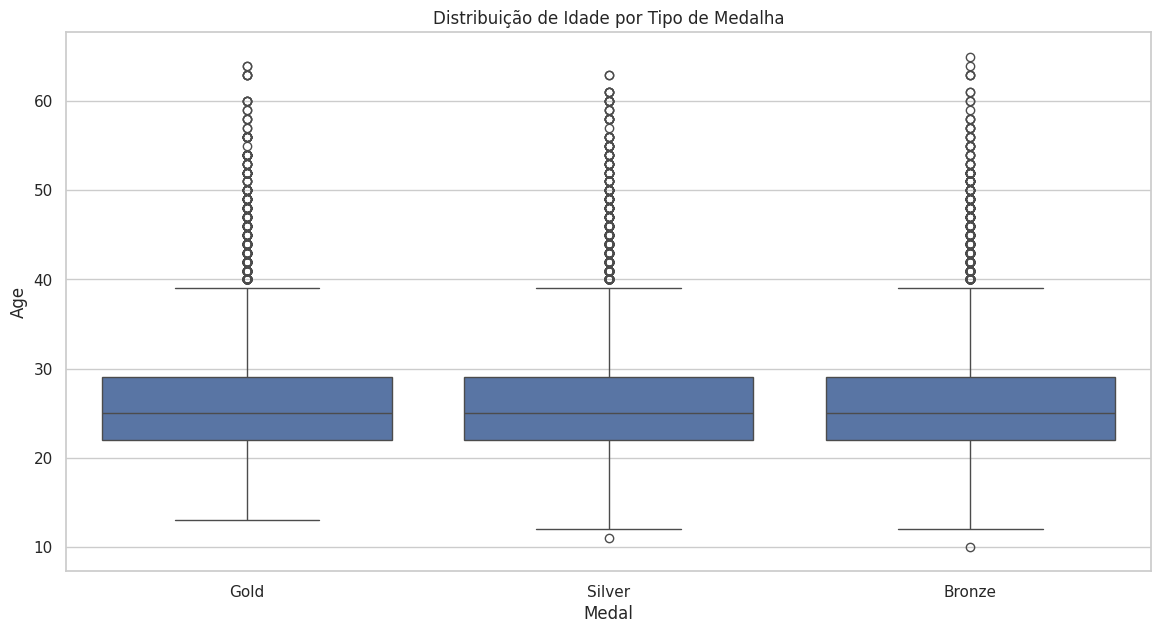

In [22]:
sns.boxplot(data=athlete_medals, x='Medal', y='Age', order=['Gold', 'Silver', 'Bronze'])
plt.title("Distribuição de Idade por Tipo de Medalha")
plt.show()

Exibir estatísticas descritivas para atletas que ganharam medalhas

In [23]:
print("\nDistribuição de Idade, Altura e Peso para Atletas que Ganharam Medalhas:")
print(athlete_medals[['Age', 'Height', 'Weight']].describe())


Distribuição de Idade, Altura e Peso para Atletas que Ganharam Medalhas:
                Age        Height        Weight
count  39772.000000  39697.000000  39607.000000
mean      25.917882    177.468799     73.865018
std        5.835160     10.152087     13.837551
min       10.000000    136.000000     28.000000
25%       22.000000    170.000000     64.000000
50%       25.000000    177.745402     73.839129
75%       29.000000    184.000000     82.000000
max       65.000000    223.000000    182.000000
